# COVID-19 INDIA DATA ANALYSIS AND TRAINING MACHINE LEARNING MODEL (REGRESSION MODEL) TO PREDICT CASES IN UPCOMING DAYS

## Import Libraries.

In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Reading .csv file as dataframe.

In [88]:
corona_dataset_csv = pd.read_csv("dataset/rawdata.csv")

## Shape of dataframe.

In [89]:
corona_dataset_csv.shape

(145, 7)

## Removing unnecessary columns.

In [90]:
corona_dataset_csv.drop(["Date","Total Confirmed","Daily Recovered","Total Recovered","Daily Deceased","Total Deceased"],axis=1,inplace=True)

## New shape of dataframe.

In [91]:
corona_dataset_csv.shape

(145, 1)

## New dataframe to .csv file.

In [92]:
corona_dataset_csv.to_csv(r'dataset/Y_data.csv', index = False)

## .csv file to array.

In [93]:
Y_full = np.genfromtxt("dataset/Y_data.csv", delimiter=";", skip_header=1)

## Splitting our data as train set, dev set, test set in 80-10-10 ratio.
#### Train set : 30 January 2020 to 23 May 2020 (115 days).
#### Train set : 24 May 2020 to 7 June 2020 (15 days).
#### Train set : 8 June 2020 to 22 June 2020 (15 days).

In [94]:
Y_train = np.zeros((115,1))
for i in range(0,115):
    Y_train[i] = Y_full[i]

In [95]:
Y_dev = np.zeros((15,1))
for i in range(115,130):
     Y_dev[i-115] =Y_full[i]

In [96]:
Y_test = np.zeros((15,1))
for i in range(130,145):
     Y_test[i-130] = Y_full[i]

## Shape of train set, dev set, test set.

In [97]:
Y_train.shape

(115, 1)

In [98]:
Y_dev.shape

(15, 1)

In [99]:
Y_test.shape

(15, 1)

## Plotting train set.

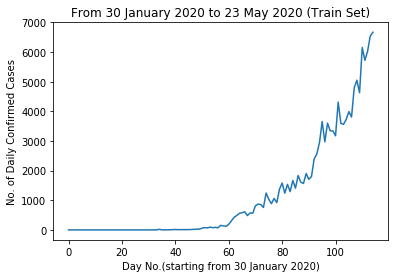

In [100]:
plt.plot(Y_train)
plt.ylabel('No. of Daily Confirmed Cases')
plt.xlabel('Day No.(starting from 30 January 2020)')
plt.title("From 30 January 2020 to 23 May 2020 (Train Set)")
plt.show()

## Plotting dev set.

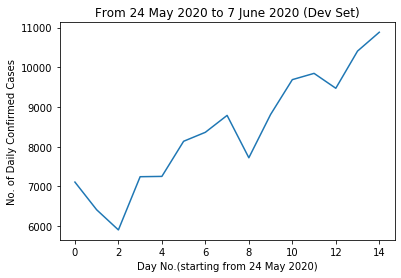

In [101]:
plt.plot(Y_dev)
plt.ylabel('No. of Daily Confirmed Cases')
plt.xlabel('Day No.(starting from 24 May 2020)')
plt.title("From 24 May 2020 to 7 June 2020 (Dev Set)")
plt.show()

## Training regression model using Normal Equation method.
Reason : As input feature is only one, so there will not be much computations. Also, we donot need to select learning rate,number of iterations,etc hyperparameters.

In [102]:
def model(X,Y,reg_rate,reg_matrix):
    theta = np.dot(np.linalg.inv(np.dot(X.T,X) + reg_rate*reg_matrix),np.dot(X.T,Y))
    return theta

## Try to find, best hypothesis for the given model.
As we have only one input feature, so we have much chance that our model can UNDERFIT, so by adding polynomial features we can reduce underfitting.

### Input dataset for train set and dev set for different degree hypothesis. Also, regularization matrix for the same degree polynomial.

In [103]:
#for degree 1
X_train1 = np.ones((115,2))
for i in range (115):
    X_train1[i][1] = (i+1)
    
X_dev1 = np.ones((15,2))
for i in range (115,130):
    X_dev1[i-115][1] = (i+1)
    
reg_matrix1 = np.zeros((2,2))
for i in range(1,2):
    reg_matrix1[i][i]=1

In [104]:
#for degree 2
X_train2 = np.ones((115,3))
for i in range (115):
    X_train2[i][2] = (i+1)**2
    X_train2[i][1] = (i+1)
    
X_dev2 = np.ones((15,3))
for i in range (115,130):
    X_dev2[i-115][2] = (i+1)**2
    X_dev2[i-115][1] = (i+1)
    
reg_matrix2 = np.zeros((3,3))
for i in range(1,3):
    reg_matrix2[i][i]=1

In [105]:
#for degree 3
X_train3 = np.ones((115,4))
for i in range (115):
    X_train3[i][3] = (i+1)**3
    X_train3[i][2] = (i+1)**2
    X_train3[i][1] = (i+1)
    
X_dev3 = np.ones((15,4))
for i in range (115,130):
    X_dev3[i-115][3] = (i+1)**3
    X_dev3[i-115][2] = (i+1)**2
    X_dev3[i-115][1] = (i+1)
    
reg_matrix3 = np.zeros((4,4))
for i in range(1,4):
    reg_matrix3[i][i]=1

In [106]:
#for degree 4
X_train4 = np.ones((115,5))
for i in range (115):
    X_train4[i][4] = (i+1)**4
    X_train4[i][3] = (i+1)**3
    X_train4[i][2] = (i+1)**2
    X_train4[i][1] = (i+1)
    
X_dev4 = np.ones((15,5))
for i in range (115,130):
    X_dev4[i-115][4] = (i+1)**4
    X_dev4[i-115][3] = (i+1)**3
    X_dev4[i-115][2] = (i+1)**2
    X_dev4[i-115][1] = (i+1)
    
reg_matrix4 = np.zeros((5,5))
for i in range(1,5):
    reg_matrix4[i][i]=1

### Hypothesis for different degrees.

In [107]:
def hypothesis_deg1(theta,x):
    pred_value1 = theta[0] + theta[1]*x
    return pred_value1

In [108]:
def hypothesis_deg2(theta,x):
    pred_value2 = theta[0] + theta[1]*x + theta[2]*(x**2)
    return pred_value2

In [109]:
def hypothesis_deg3(theta,x):
    pred_value3 = theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3)
    return pred_value3

In [110]:
def hypothesis_deg4(theta,x):
    pred_value4 = theta[0] + theta[1]*x + theta[2]*(x**2) + theta[3]*(x**3) + theta[4]*(x**4)
    return pred_value4

### Cost function for different degree hypothesis.

In [111]:
def compute_cost1(X,Y,theta,reg_rate):
    L = X.shape[0]
    cost=0
    for l in range (L):
        h = hypothesis_deg1(theta,X[l][1])
        squared_error = (h - Y[l])**2 
        cost += squared_error
    np.squeeze(cost)
    return 1/(2*l)*(cost+ reg_rate*(theta[1]**2))

In [112]:
def compute_cost2(X,Y,theta,reg_rate):
    L = X.shape[0]
    cost=0
    for l in range (L):
        h = hypothesis_deg2(theta,X[l][1])
        squared_error = (h - Y[l])**2 
        cost += squared_error
    np.squeeze(cost)
    return 1/(2*l)*(cost+ reg_rate*(theta[1]**2+theta[2]**2))

In [113]:
def compute_cost3(X,Y,theta,reg_rate):
    L = X.shape[0]
    cost=0
    for l in range (L):
        h = hypothesis_deg3(theta,X[l][1])
        squared_error = (h - Y[l])**2 
        cost += squared_error
    np.squeeze(cost)
    return 1/(2*l)*(cost+ reg_rate*(theta[1]**2+theta[2]**2+theta[3]**2))

In [114]:
def compute_cost4(X,Y,theta,reg_rate):
    L = X.shape[0]
    cost=0
    for l in range (L):
        h = hypothesis_deg4(theta,X[l][1])
        squared_error = (h - Y[l])**2 
        cost += squared_error
    np.squeeze(cost)
    return 1/(2*l)*(cost+ reg_rate*(theta[1]**2+theta[2]**2+theta[3]**2++theta[4]**2))

## Finding best hypothesis using  model trained by train set and predicted on dev set.

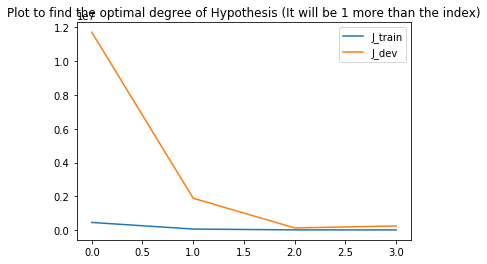

In [115]:
J_train = np.ones((4,1))
J_dev = np.ones((4,1))

theta1 = model(X_train1,Y_train,0,reg_matrix1)
J_train[0] = compute_cost1(X_train1,Y_train,theta1,0)
J_dev[0] = compute_cost1(X_dev1,Y_dev,theta1,0)

theta2 = model(X_train2,Y_train,0,reg_matrix2)
J_train[1] = compute_cost2(X_train2,Y_train,theta2,0)
J_dev[1] = compute_cost2(X_dev2,Y_dev,theta2,0)

theta3 = model(X_train3,Y_train,0,reg_matrix3)
J_train[2] = compute_cost3(X_train3,Y_train,theta3,0)
J_dev[2] = compute_cost3(X_dev3,Y_dev,theta3,0)

theta4 = model(X_train4,Y_train,0,reg_matrix4)
J_train[3] = compute_cost4(X_train4,Y_train,theta4,0)
J_dev[3] = compute_cost4(X_dev4,Y_dev,theta4,0)

J_train_improved = np.log(J_train*1e+10)
J_dev_improved = np.log(J_dev*1e+10)
plt.plot(J_train,label="J_train")
plt.plot(J_dev,label="J_dev")
plt.legend()

plt.title("Plot to find the optimal degree of Hypothesis (It will be 1 more than the index)")
plt.show()

We get best values at index=2.
So, 3rd degree hypothesis is best fit.

## Final model trained without regularization.

In [116]:
theta_final = model(X_train3,Y_train,0,reg_matrix3)
J_train_final = compute_cost3(X_train3,Y_train,theta3,0)
J_train_final

array([26447.13797917])

## Regularization parameter tuning.

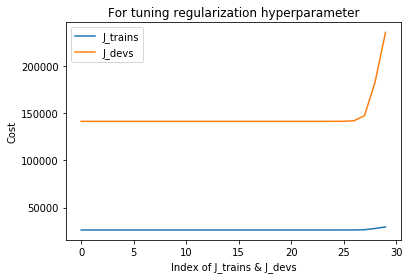

In [117]:
J_trains = []
J_devs=[]
i= 1e-25
while i<1e+5:
    theta_final = model(X_train3,Y_train,i,reg_matrix3)
    J_train_final = compute_cost3(X_train3,Y_train,theta_final,i)
    J_dev_final = compute_cost3(X_dev3,Y_dev,theta_final,i)
    i *= 10
    J_trains.append(J_train_final)
    J_devs.append(J_dev_final)
plt.plot(J_trains,label="J_trains")
plt.plot(J_devs,label="J_devs")
plt.xlabel("Index of J_trains & J_devs")
plt.ylabel("Cost")
plt.title("For tuning regularization hyperparameter")
plt.legend()
plt.show()

In [118]:
J_trains

[array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.13797917]),
 array([26447.1379792]),
 array([26447.13797947]),
 array([26447.13798215]),
 array([26447.13800903]),
 array([26447.13827783]),
 array([26447.14096578]),
 array([26447.16784507]),
 array([26447.43661607]),
 array([26450.12214279]),
 array([26476.76085374]),
 array([26723.13463323]),
 array([28087.23675946]),
 array([29697.0113056])]

In [119]:
J_devs

[array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331128]),
 array([141334.68331117]),
 array([141334.68331128]),
 array([141334.68331185]),
 array([141334.68331756]),
 array([141334.68337522]),
 array([141334.68395036]),
 array([141334.68970339]),
 array([141334.74723268]),
 array([141335.32252175]),
 array([141341.07513056]),
 array([141398.57304456]),
 array([141970.74263195]),
 array([147419.88102648]),
 array([182724.80189331]),
 array([235454.29738805])]

As, there is no much diffrerence by using regularization, but we can use it for ensuring invertibility of matrix in model training.
Best result are seen at regularization parameter = 10<sup>-10</sup>.

## Final Model

In [120]:
lambd = 1e-10
theta_final = model(X_train3,Y_train,lambd,reg_matrix3)
J_train_final = compute_cost3(X_train3,Y_train,theta_final,lambd)
J_dev_final = compute_cost3(X_dev3,Y_dev,theta_final,lambd)

### Parameter values.

In [121]:
theta_final

array([[-1.58907720e+02],
       [ 2.60765784e+01],
       [-9.79794346e-01],
       [ 1.07663302e-02]])

### Cost of train set.

In [122]:
J_train_final

array([26447.13797917])

### Cost of dev set.

In [123]:
J_dev_final

array([141334.68331117])

## Finding accuracy on test set.

In [124]:
X_test = np.ones((15,1))
for i in range (130,145):
    X_test[i-130] = (i+1)

Y_test_predicted = np.zeros((15,1))
for i in range(15):
    Y_test_predicted[i] = hypothesis_deg3(theta_final,X_test[i]) 

In [125]:
total_diff = 0
for i in range(15):
    diff = np.abs(Y_test[i]-Y_test_predicted[i])
    total_diff+=diff/Y_test[i]
accuracy = 100 - (total_diff/15)*100
print("Accuracy of model in test set(8 June 2020 to 22 June 200) is : %f percent"%(accuracy))    

Accuracy of model in test set(8 June 2020 to 22 June 200) is : 90.268762 percent


## Plotting original values vs predicted values of Daily Confirmed Cases.

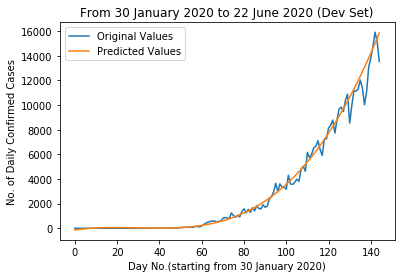

In [126]:
X_full = np.ones((145,1))
for i in range (0,145):
    X_full[i] = (i+1)
Y_full_predicted = np.zeros((145,1))
for i in range(145):
    Y_full_predicted[i] = hypothesis_deg3(theta_final,X_full[i])
plt.plot(Y_full,label="Original Values")
plt.plot(Y_full_predicted,label="Predicted Values")
plt.ylabel('No. of Daily Confirmed Cases')
plt.xlabel('Day No.(starting from 30 January 2020)')
plt.title("From 30 January 2020 to 22 June 2020 (Dev Set)")
plt.legend()

## To predict value of Daily Confirmed Case by entering date.
We suggest to use date after 15 April,2020 , as before that cases coming were very much random.

In [127]:
from datetime import date 

def numOfDays(y,m,d): 
    date1 = date(2020,1,30)
    return (date(y,m,d)-date1).days + 1 

In [128]:
print("Enter date for which you want to check the predicted value of cases:")
day=int(input("Day="))
month=int(input("Month="))
year=int(input("Year="))
day_no = numOfDays(year,month,day)
value = hypothesis_deg3(theta_final,day_no)
print("Predicted value for %i/%i/%i : %i"%(day,month,year,value))

Enter date for which you want to check the predicted value of cases:
Day=22
Month=06
Year=2020
Predicted value for 22/6/2020 : 15844
